<h1 style='color:magenta' align=center><font size=7>Classification Models</font></h1>

In [1]:
# info: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#

import pandas as pd
from sklearn.metrics import accuracy_score

pd.set_option('max_columns', None)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv'

df = pd.read_csv(url, sep=',')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [2]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [3]:
# feature category to numerical

df.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)
df.replace(to_replace=['Male','Female'], value=[1,0], inplace=True)
df.replace(to_replace=['Positive','Negative'], value=[1,0], inplace=True)

In [4]:
pd.concat([df.head(3), df.tail(3)])

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(520, 17)

In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
# split training & testing sets

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=.2, random_state=42)

print('Training samples:', X_train.shape[0]) 
print('Testing samples:', X_test.shape[0])

Training samples: 416
Testing samples: 104


<h1 style='color:magenta' align=center><font size=7>K-Nearest Neighbors</font></h1>

In [8]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

#training the model, n_neighbors=5 deafault
knn_clf = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn_clf.fit(X_train, y_train)

print(knn_clf.predict(X_test))

print(knn_clf.score(X_train, y_train)*100, "percent accurate")

accuracy_score(y_test, knn_clf.predict(X_test))

[0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0]
93.99038461538461 percent accurate


0.875

<h1 style='color:magenta' align=center><font size=7>Naive Bayes</font></h1>

In [9]:
# Naive Bayes

from sklearn import naive_bayes

nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)

print(nb.predict(X_test))

print(nb.score(X_train, y_train)*100, "percent accurate")

accuracy_score(y_test, nb.predict(X_test))

[1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0]
89.66346153846155 percent accurate


0.9134615384615384

<h1 style='color:magenta' align=center><font size=7>Random Forest</font></h1>

In [10]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100) #forest consist of 100 tress
rfc.fit(X_train, y_train)

print(rfc.predict(X_test))

print(rfc.score(X_train, y_train)*100, 'percent accurate')

accuracy_score(y_test, rfc.predict(X_test))

[0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0]
100.0 percent accurate


0.9903846153846154

<h1 style='color:magenta' align=center><font size=7>Decision Tree</font></h1>

In [11]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print(dtc.predict(X_test))

print(dtc.score(X_train, y_train)*100, 'percent accurate')

accuracy_score(y_test, dtc.predict(X_test))

[0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0]
100.0 percent accurate


0.9711538461538461

[Text(1268.687109375, 1032.8400000000001, 'Polyuria <= 0.5\ngini = 0.481\nsamples = 416\nvalue = [167, 249]\nclass = Negative'),
 Text(779.67421875, 924.1200000000001, 'Gender <= 0.5\ngini = 0.399\nsamples = 214\nvalue = [155, 59]\nclass = Positive'),
 Text(317.3625, 815.4000000000001, 'Alopecia <= 0.5\ngini = 0.44\nsamples = 49\nvalue = [16, 33]\nclass = Negative'),
 Text(195.3, 706.6800000000001, 'Age <= 34.5\ngini = 0.239\nsamples = 36\nvalue = [5, 31]\nclass = Negative'),
 Text(97.65, 597.96, 'muscle stiffness <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = Positive'),
 Text(48.825, 489.24, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Positive'),
 Text(146.47500000000002, 489.24, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Negative'),
 Text(292.95000000000005, 597.96, 'Irritability <= 0.5\ngini = 0.069\nsamples = 28\nvalue = [1, 27]\nclass = Negative'),
 Text(244.125, 489.24, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = Negative'),
 Text(341.7750000000000

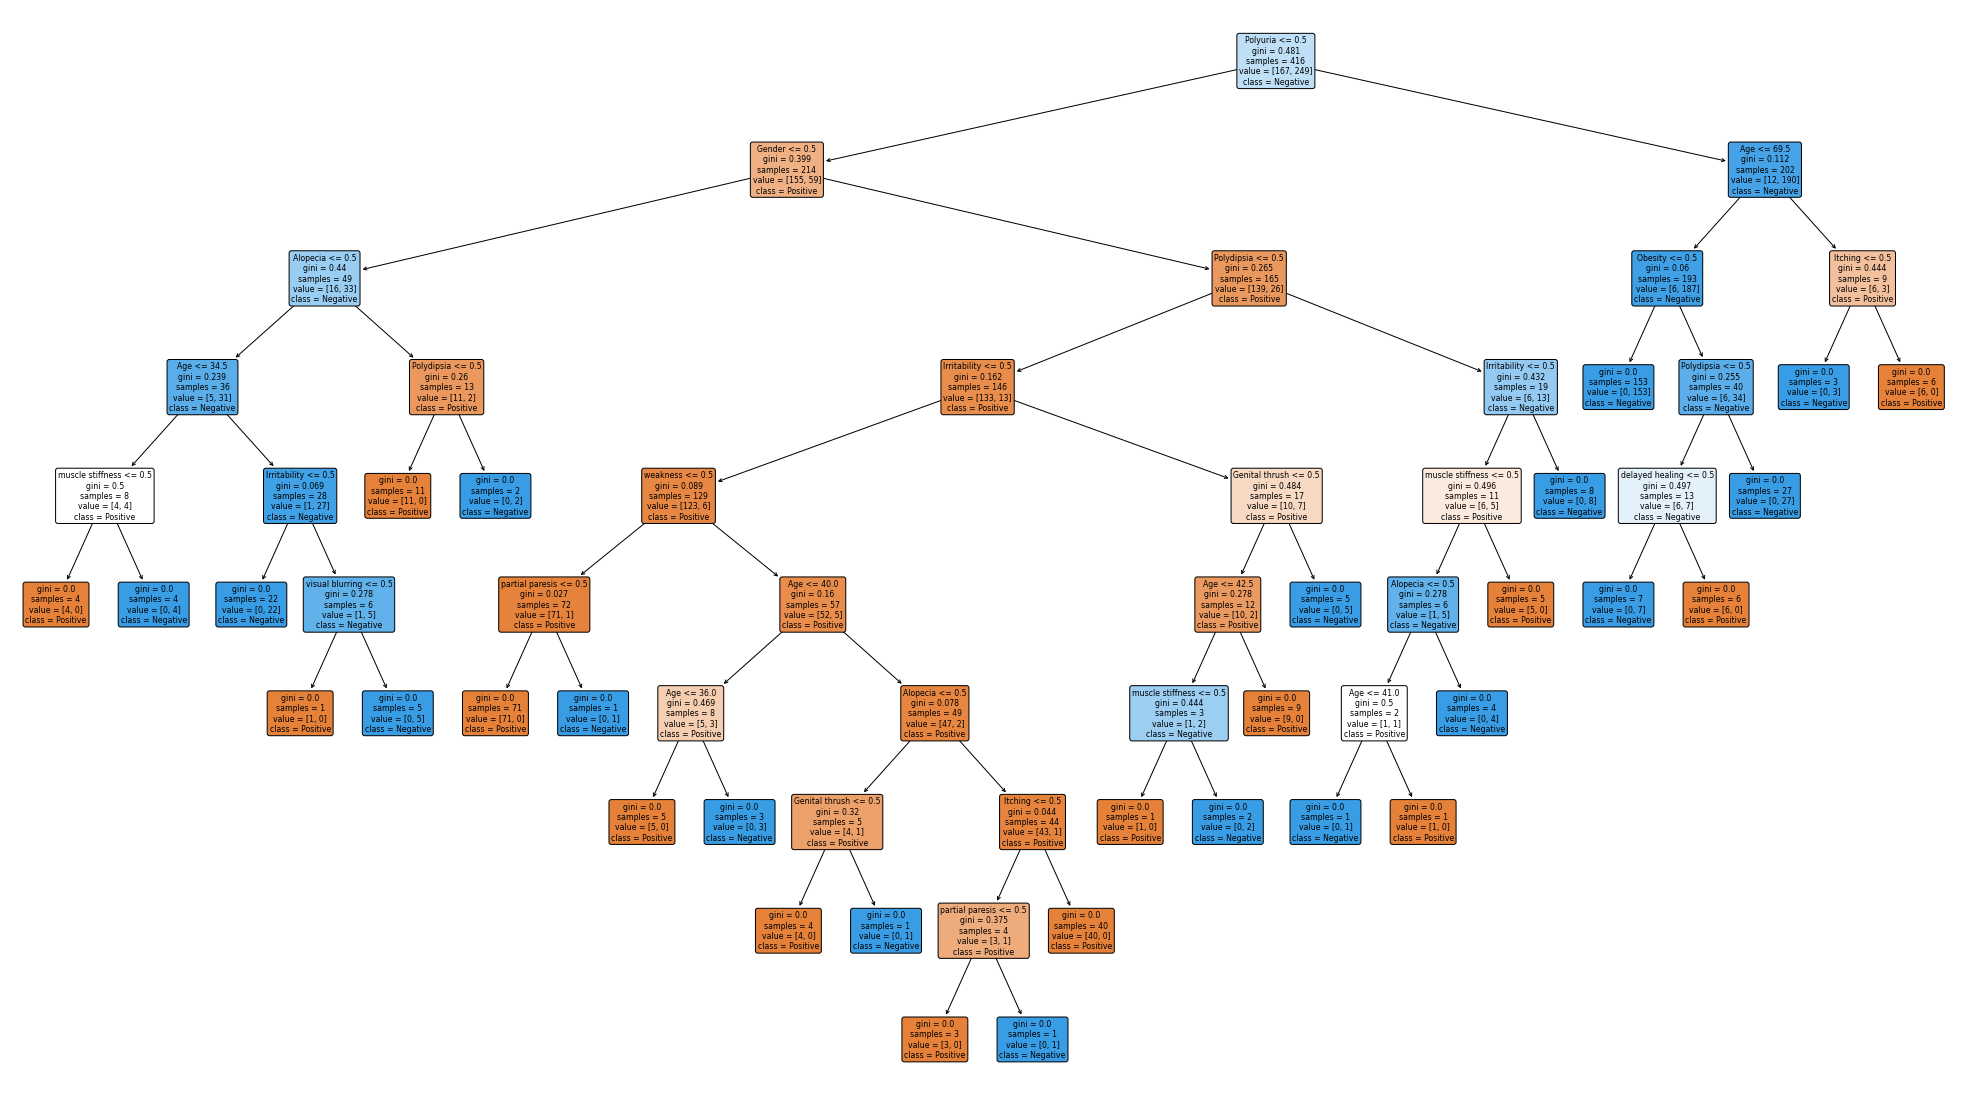

In [12]:
# plot the decision tree (training set)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 20))
plot_tree(dtc.fit(X_train, y_train), filled = True,
            rounded = True,
            class_names = ['Positive', 'Negative'],
            feature_names = df.columns)

<h1 style='color:magenta' align=left><font size=6>Evaluate Model Performances</font></h1>

In [13]:
# evaluate the best model performance

# test_size=.90, random_state=0
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=.90, random_state=0)

print('Training samples:', X_train.shape[0]) 
print('Testing samples:', X_test.shape[0])

Training samples: 52
Testing samples: 468


In [14]:
rfc = RandomForestClassifier(n_estimators=100) #forest consist of 100 tress
rfc.fit(X_train, y_train)
rfc.predict(X_test)

print("Random Forest: ", accuracy_score(y_test, rfc.predict(X_test)))


nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
nb.predict(X_test)

print("Naive Bayes: ", accuracy_score(y_test, nb.predict(X_test)))

Random Forest:  0.9145299145299145
Naive Bayes:  0.8803418803418803
